In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [43]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID =  pd.read_csv("Customer_ID.csv")
Transaction_ID = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,NaN
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,NaN
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,NaN
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,NaN
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,NaN


In [4]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Unnamed: 7
359387,10440101,09-01-2020,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,NaN
359388,10440104,05-01-2020,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,NaN
359389,10440105,06-01-2020,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,NaN
359390,10440106,06-01-2020,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,NaN
359391,10440107,03-01-2020,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,NaN


In [5]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
# Check the shape of whole dataset
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 8)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [44]:
# Check the basic information of the dataframes
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Unnamed: 7      0 non-null       float64
dtypes: float64(4), int64(1), object(3)
memory usage: 21.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (U

In [45]:
# Remove the Unnamed column with NaN
Cab_Data = Cab_Data.iloc[: , :-1]

In [18]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [46]:
Cab_Data_cpy = Cab_Data

In [50]:
Cab_Data_cpy.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Year,Month
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,2018,8
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,2018,6
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2018,2
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,2018,7
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,2018,3


In [47]:
from datetime import datetime
Cab_Data_cpy['Year'] = pd.DatetimeIndex(Cab_Data_cpy['Date of Travel']).year
Cab_Data_cpy['Month'] = pd.DatetimeIndex(Cab_Data_cpy['Date of Travel']).month

In [48]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab = Cab_Data_cpy[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data_cpy[Cab_Data['Company']=='Yellow Cab']

In [49]:
PinkCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Year,Month
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,2018,8
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,2018,6
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2018,2
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,2018,7
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,2018,3


In [33]:
YellowCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Year,Month
233,10000384,02-01-2018,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,2018,2018,2
234,10000385,09-01-2018,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,2018,2018,9
235,10000386,03-01-2018,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,2018,2018,3
236,10000387,06-01-2018,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,2018,2018,6
237,10000388,07-01-2018,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,2018,2018,7


In [49]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})
Cab_Data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,8
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,6
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,7
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,3


In [50]:
for col in Cab_Data_cpy.columns:
    if ' ' in col:
        Cab_Data_cpy= Cab_Data_cpy.rename(columns={col:col.replace(' ','_')})
Cab_Data_cpy.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,8
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,6
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,7
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,3


In [51]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})


In [52]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [53]:
#plot0 = PinkCab[PinkCab['Year']=='2018'].groupby(['Month']).Transaction_ID.count()
PinkCab = Cab_Data_cpy[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data_cpy[Cab_Data['Company']=='Yellow Cab']
PinkCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,8
1,10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,6
2,10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2
3,10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,7
4,10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,3


In [69]:
PCplot0 = PinkCab[PinkCab['Year']==2018].groupby(['Month']).Transaction_ID.count()
PCplot1 = PinkCab[PinkCab['Year']==2019].groupby(['Month']).Transaction_ID.count()
PCplot2 = PinkCab[PinkCab['Year']==2020].groupby(['Month']).Transaction_ID.count()

In [67]:
PCplot0

Month
1     1204
2     1417
3     1593
4     1541
5     1840
6     1853
7     2062
8     2237
9     2378
10    2989
11    2983
12    2810
Name: Transaction_ID, dtype: int64

In [70]:
PCplot1

Month
1     1646
2     1911
3     1790
4     2059
5     2010
6     2110
7     2567
8     2674
9     3234
10    3492
11    3529
12    3292
Name: Transaction_ID, dtype: int64

In [71]:
PCplot2

Month
1     1738
2     1598
3     1921
4     1784
5     1977
6     2636
7     2641
8     2738
9     3025
10    3142
11    3040
12    3250
Name: Transaction_ID, dtype: int64

In [72]:
YCplot0 = YellowCab[YellowCab['Year']==2018].groupby(['Month']).Transaction_ID.count()
YCplot1 = YellowCab[YellowCab['Year']==2019].groupby(['Month']).Transaction_ID.count()
YCplot2 = YellowCab[YellowCab['Year']==2020].groupby(['Month']).Transaction_ID.count()

In [73]:
YCplot0

Month
1     4578
2     5322
3     5880
4     5743
5     6515
6     6087
7     6965
8     6688
9     7130
10    8831
11    9056
12    8814
Name: Transaction_ID, dtype: int64

In [74]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1     4588
2     4926
3     5304
4     5384
5     5827
6     6599
7     7270
8     7649
9     8637
10    9623
11    9552
12    9352
Name: Transaction_ID, dtype: int64

In [75]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     16905
2     17988
3     19446
4     19950
5     20265
6     21271
7     23757
8     23267
9     25633
10    28282
11    28852
12    29065
Name: Transaction_ID, dtype: int64

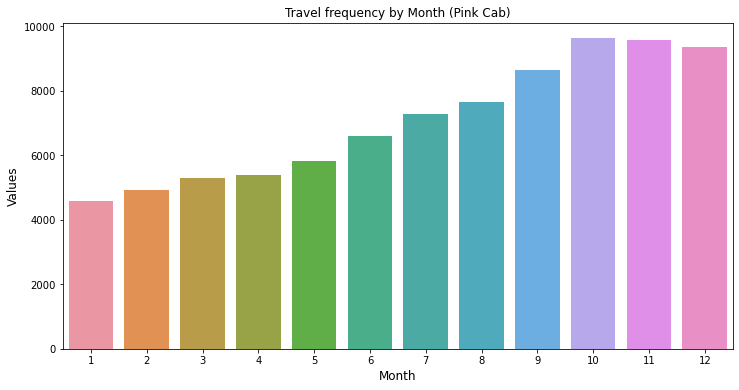

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

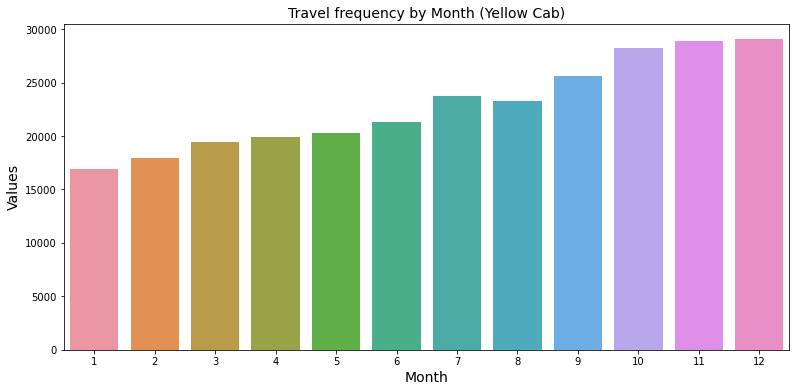

In [84]:
plt.figure(figsize=(13,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

#### Findings - Yellow Cab has higher travels (29000) in the month of December which is the holiday season compared to Pink Cab (9000)

In [79]:
overall_distance = Cab_Data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [80]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


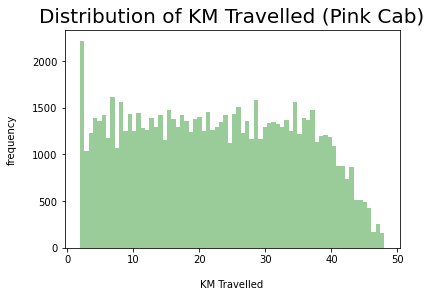

In [81]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

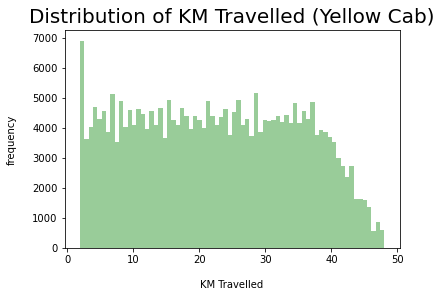

In [82]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

#### Findings - From the above graphs, we can see that most of the rides are in the range of approximately 2 to 48 KM.

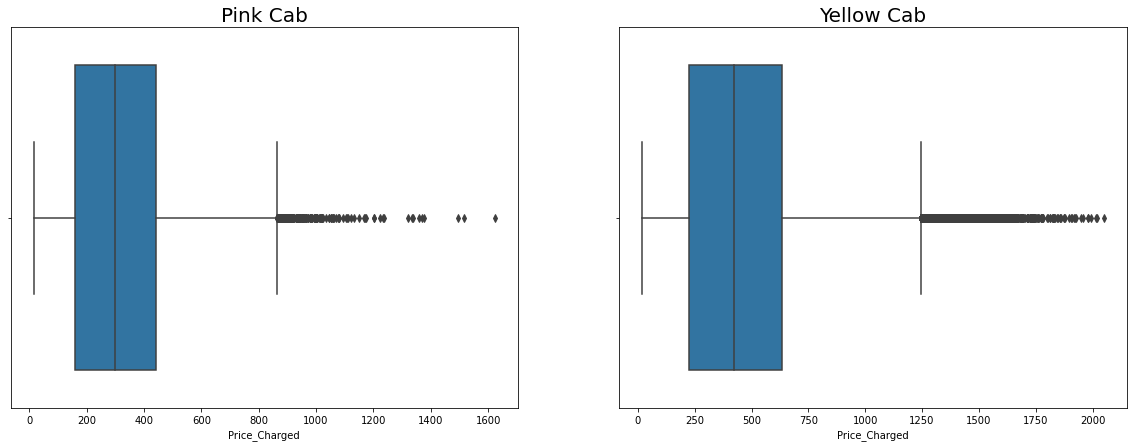

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

#### Outliers - These outliers are due to use of high-end cars. The price charge range for Yellow cab is more than the Pink cab. 

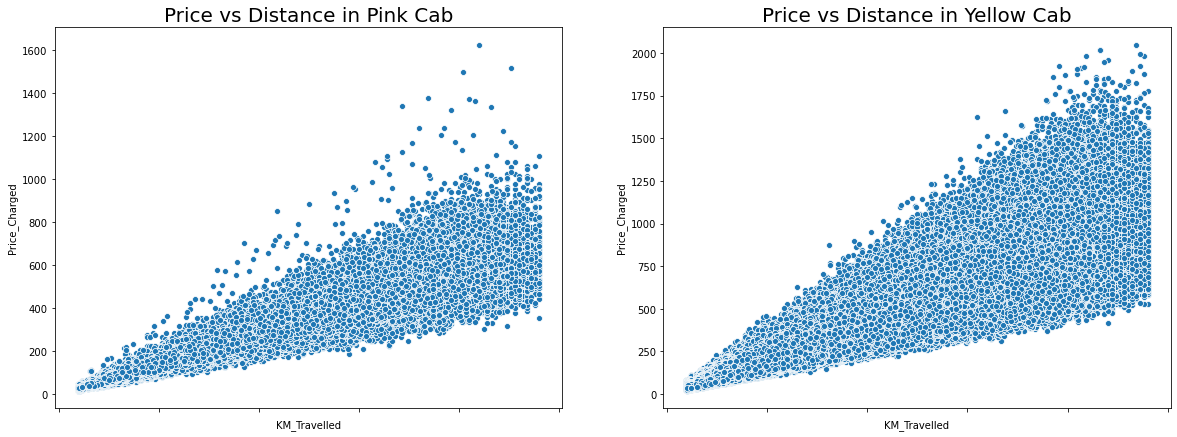

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

In [87]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594857

In [88]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478461

Distance is one of the important factors, which drives the price of the rides.
We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
The price for Yellow cab is higher compared to Pink cab.

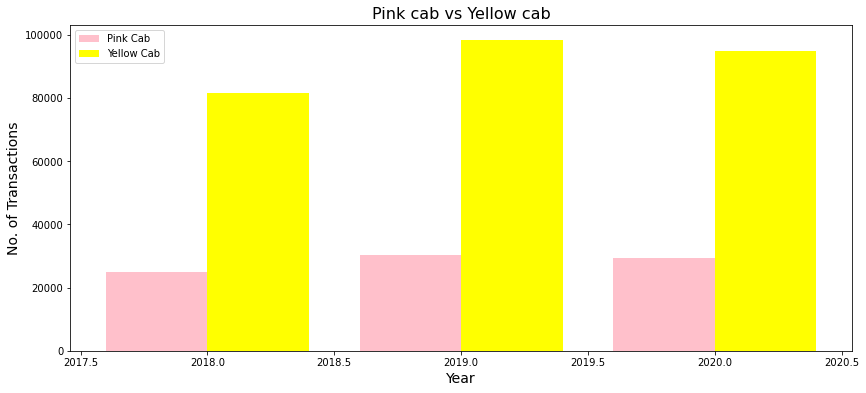

In [90]:
plot1 = Cab_Data[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data_cpy.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

#### From the graph it shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.

Individually, looking at Pink and Yellow cabs' average of cost of trip and price charged yearly

## Pink Cab

In [54]:
PinkCab_PriceCharged=Cab_Data_cpy[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

In [55]:
PinkCab_TripCost=Cab_Data_cpy[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

In [56]:
PinkCab_Profit = PinkCab_PriceCharged - PinkCab_TripCost
PinkCab_Profit

Year
2018    67.973254
2019    67.103261
2020    53.582578
dtype: float64

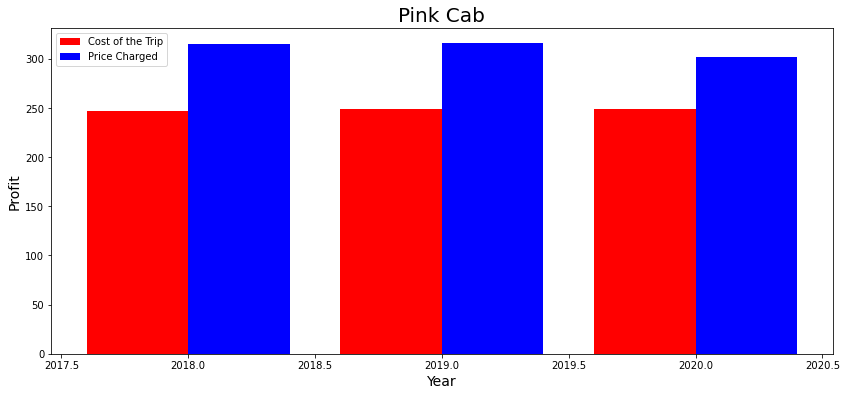

In [16]:
plot1 = Cab_Data_cpy[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data_cpy[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data_cpy[Cab_Data_cpy.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='blue', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


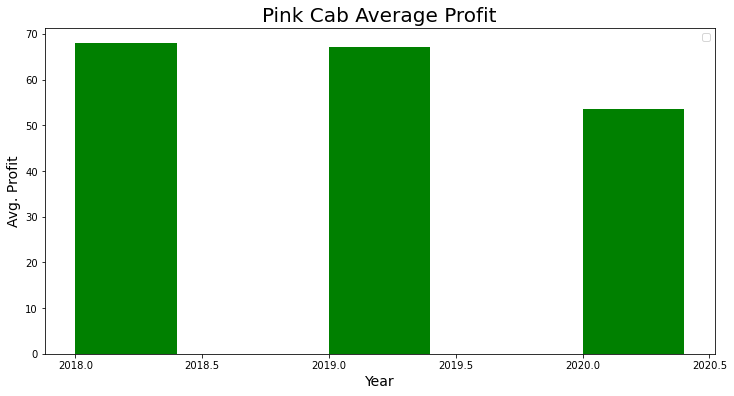

In [106]:

plt.figure(figsize=(12,6))
ax = plt.subplot(111)
#ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, PinkCab_Profit.values, width=0.4, color='green', align='center')
plt.ylabel('Avg. Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab Average Profit', fontsize=20)
plt.legend()
plt.show()

## Yellow Cab 

In [57]:
YellowCab_PriceCharged = Cab_Data_cpy[Cab_Data_cpy.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

In [58]:
YellowCab_TripCost = Cab_Data_cpy[Cab_Data_cpy.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

In [59]:
YellowCab_Profit = YellowCab_PriceCharged - YellowCab_TripCost

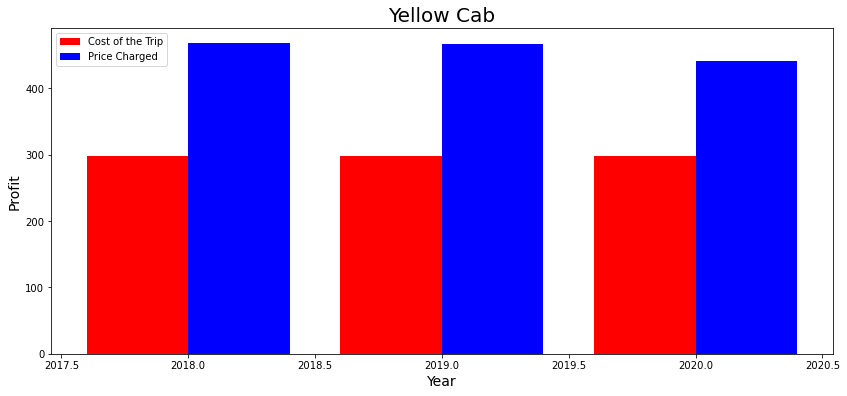

In [25]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='blue', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


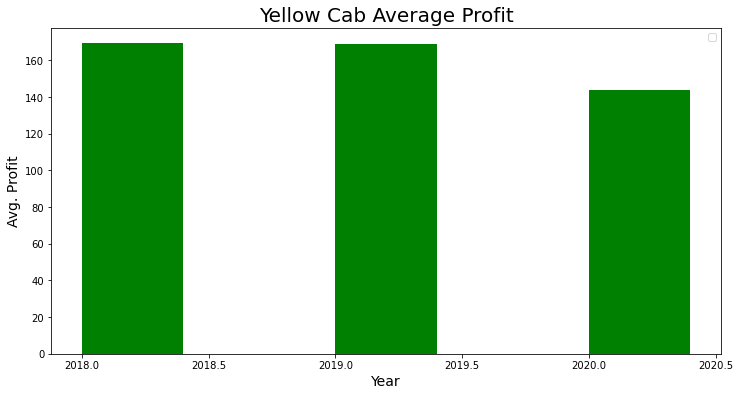

In [107]:
plt.figure(figsize=(12,6))
ax = plt.subplot(111)
#ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='red', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, YellowCab_Profit.values, width=0.4, color='green', align='center')
plt.ylabel('Avg. Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Yellow Cab Average Profit', fontsize=20)
plt.legend()
plt.show()

### Yellow Cab has higher profit returns than Pink Cab in all the 3 years

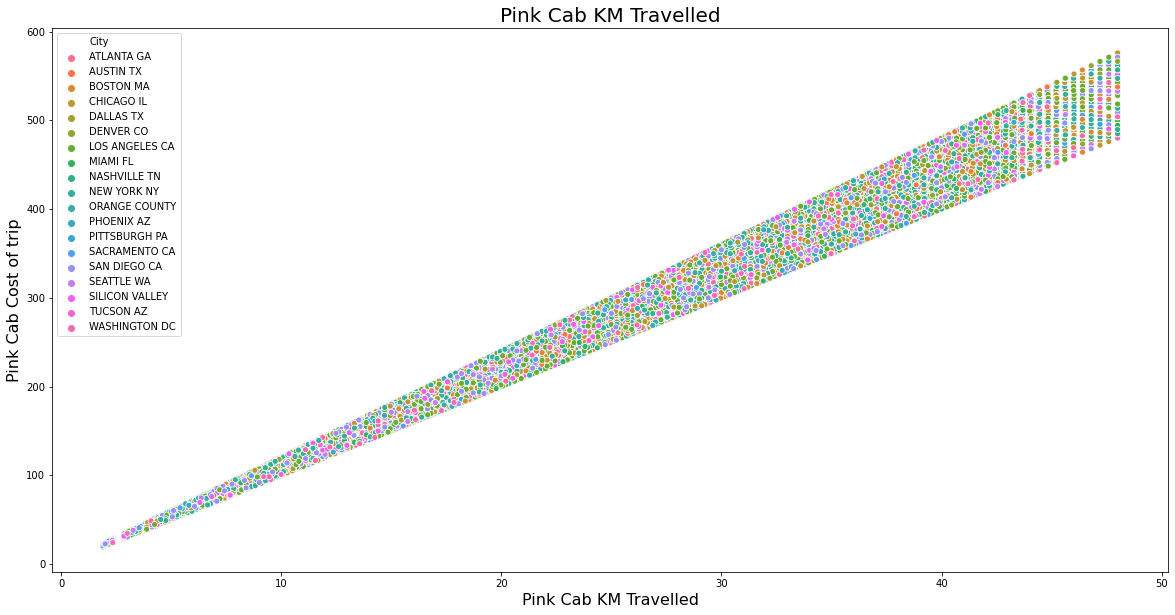

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

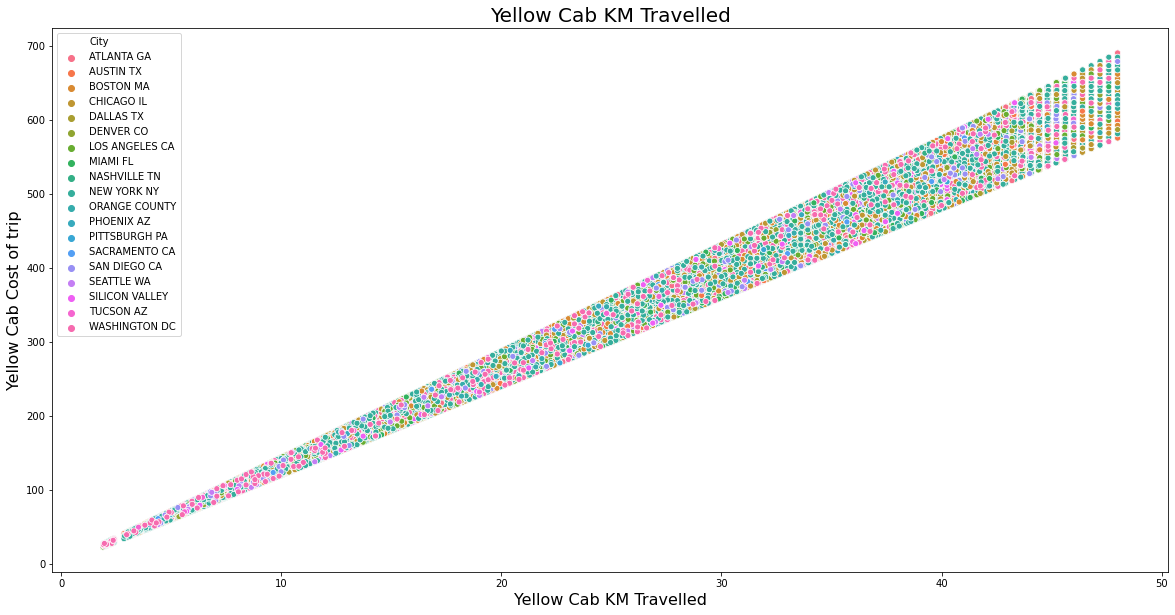

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

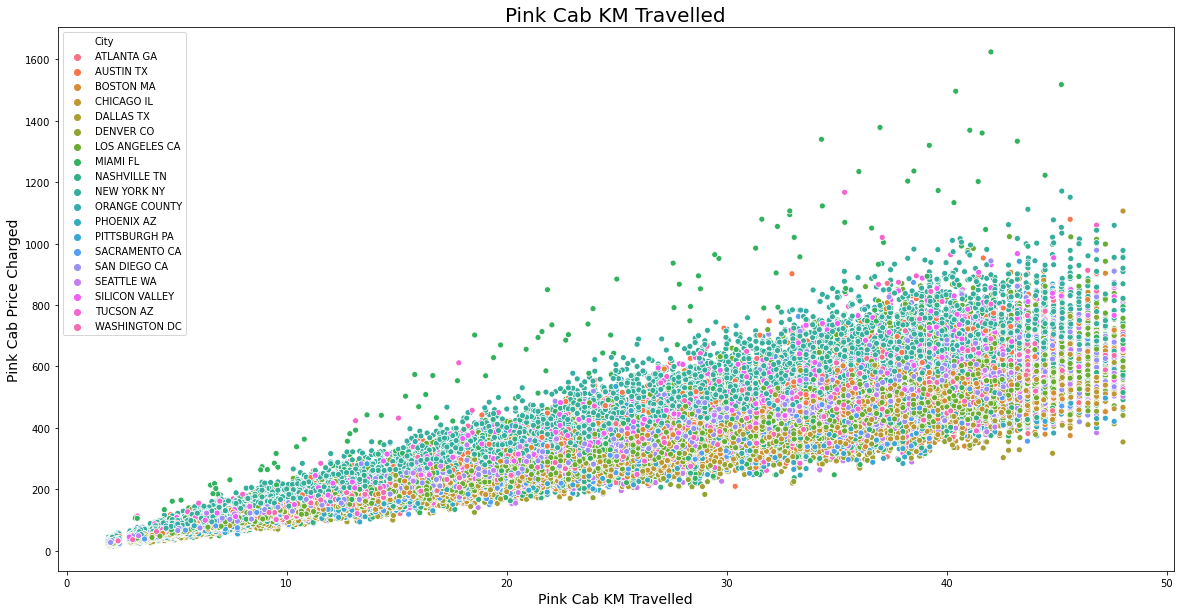

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

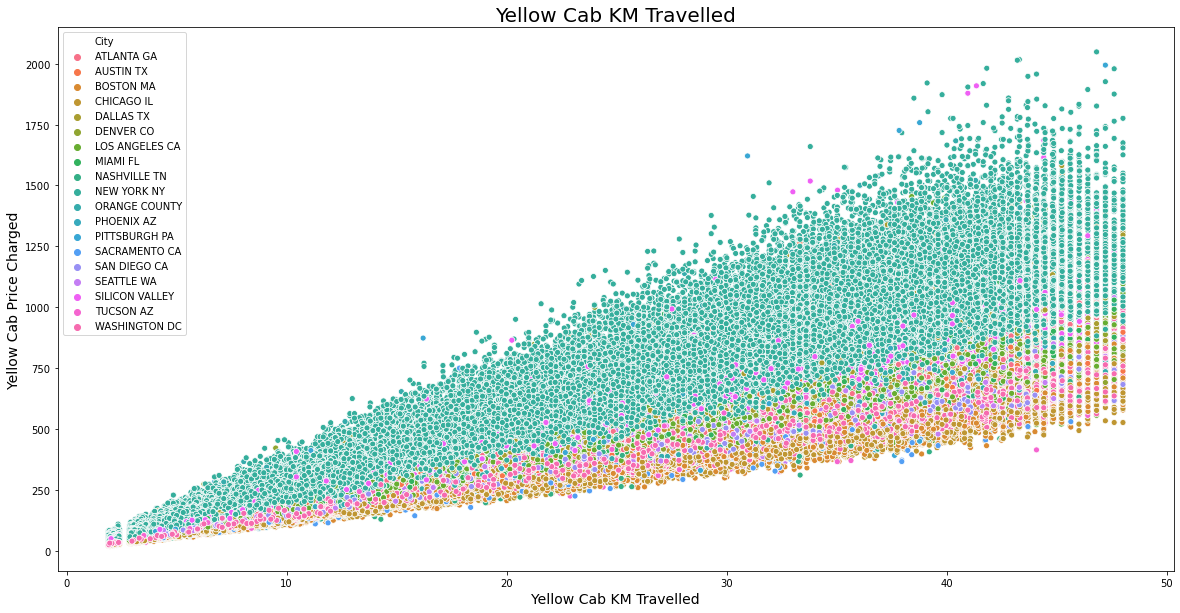

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

-From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.
-From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities.
and for Pink cab all the cities have the same increase in prices with increase in distance
the outliers exist in both the graphs which may be due to high end cars or weather.

### Creating Master Data

In [60]:
left = Cab_Data_cpy.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,,
10000011,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,8,29290,Card
10000012,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,6,27703,Card
10000013,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2,28712,Cash
10000014,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,7,28020,Cash
10000015,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,3,27182,Card


In [61]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

,,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,,
10000011,29290,08-01-2018,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2018,8,Card,Male,28,10813
10000012,27703,06-01-2018,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2018,6,Card,Male,27,9237
10000013,28712,02-01-2018,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2018,2,Cash,Male,53,11242
10000014,28020,07-01-2018,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2018,7,Cash,Male,23,23327
10000015,27182,03-01-2018,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2018,3,Card,Male,33,8536


In [62]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

,,,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,,
10000011,29290,ATLANTA GA,08-01-2018,Pink Cab,30.45,370.95,313.635,2018,8,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,06-01-2018,Pink Cab,28.62,358.52,334.854,2018,6,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,02-01-2018,Pink Cab,9.04,125.20,97.632,2018,2,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,07-01-2018,Pink Cab,33.17,377.40,351.602,2018,7,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,03-01-2018,Pink Cab,8.73,114.62,97.776,2018,3,Card,Male,33,8536,"814,885","24,701"


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date_of_Travel      359392 non-null  object 
 1   Company             359392 non-null  object 
 2   KM_Travelled        359392 non-null  float64
 3   Price_Charged       359392 non-null  float64
 4   Cost_of_Trip        359392 non-null  float64
 5   Year                359392 non-null  int64  
 6   Month               359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income_(USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  object 
 12  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 41.8+ MB


In [64]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

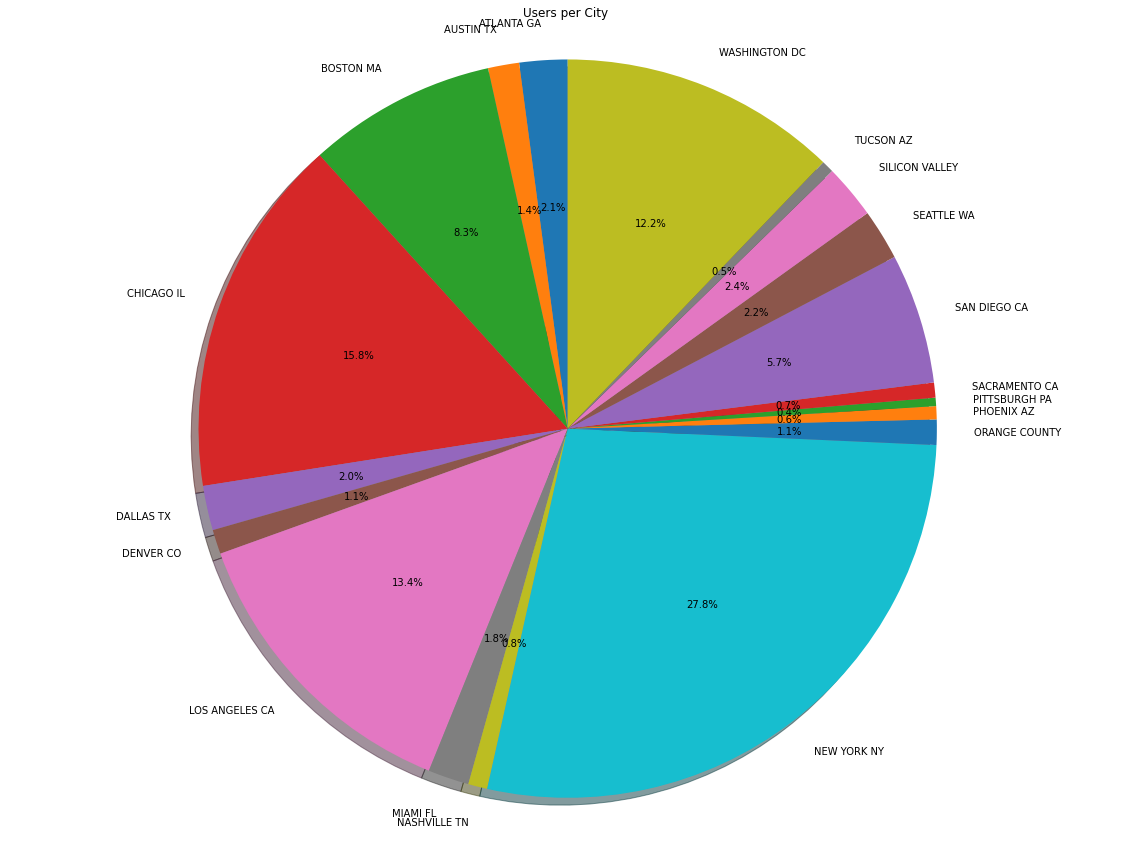

In [83]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(20,15))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

### New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13% 

In [79]:
city_income = data.groupby('City').Income.mean()
#YellowCab_TripCost = Cab_Data_cpy[Cab_Data_cpy.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

In [80]:
city_income

City
ATLANTA GA        14933.150986
AUSTIN TX         14696.495711
BOSTON MA         15128.563317
CHICAGO IL        15101.718269
DALLAS TX         14846.508194
DENVER CO         14975.655163
LOS ANGELES CA    15064.550455
MIAMI FL          14984.887202
NASHVILLE TN      14734.359801
NEW YORK NY       15184.765801
ORANGE COUNTY     15188.944500
PHOENIX AZ        15012.038275
PITTSBURGH PA     14410.332064
SACRAMENTO CA     15268.225180
SAN DIEGO CA      15049.874854
SEATTLE WA        14840.748281
SILICON VALLEY    15248.547717
TUCSON AZ         14942.952356
WASHINGTON DC     14727.430162
Name: Income, dtype: float64

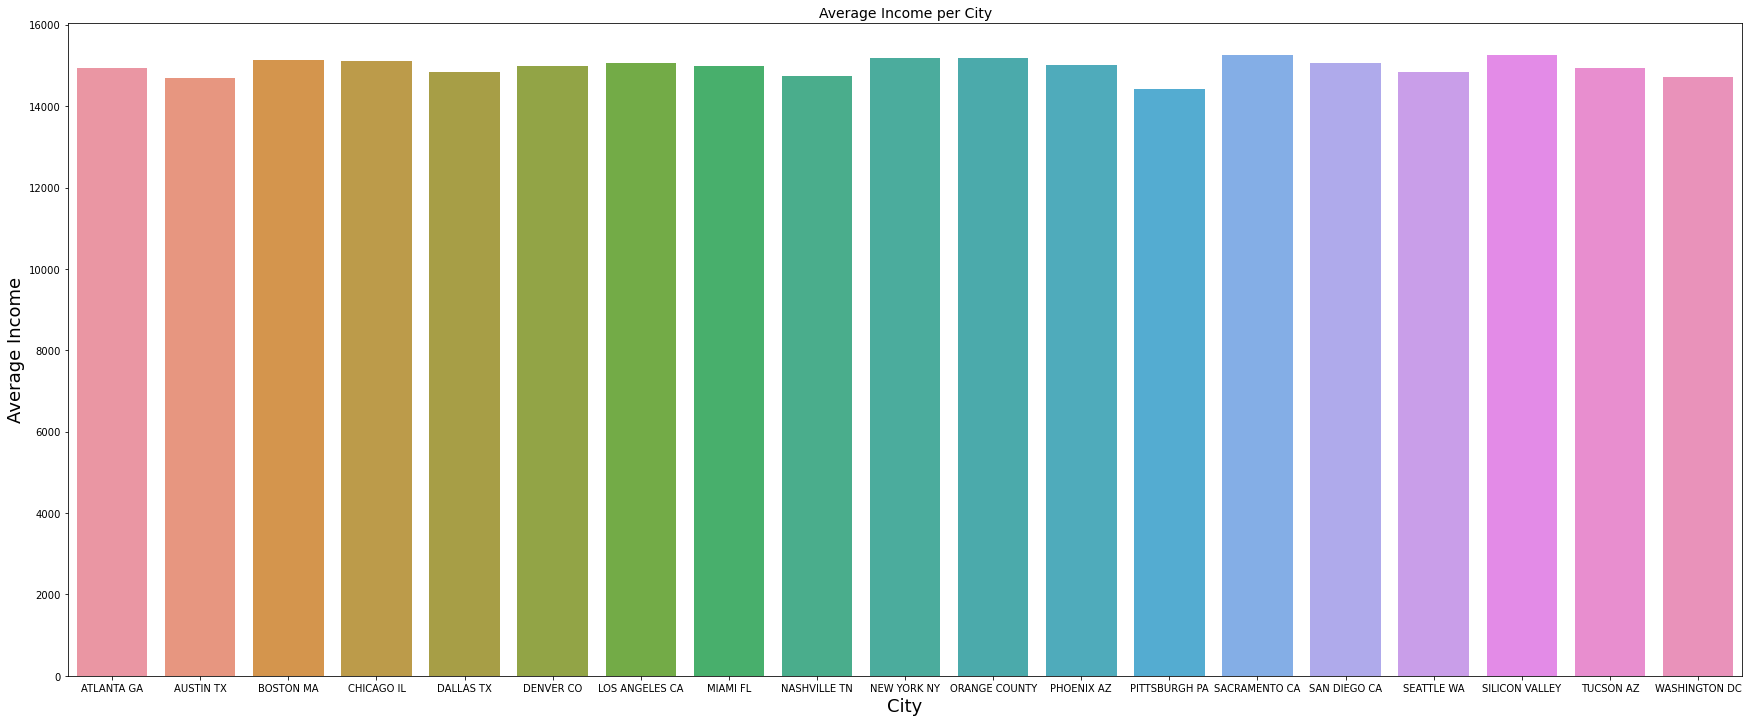

In [74]:
plt.figure(figsize=(30,12))
sns.barplot(x=city_income.index,y=city_income.values)
plt.title('Average Income per City',fontsize = 14)
plt.xlabel('City', fontsize = 18)
plt.ylabel('Average Income',fontsize = 18)
plt.show()

In [84]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

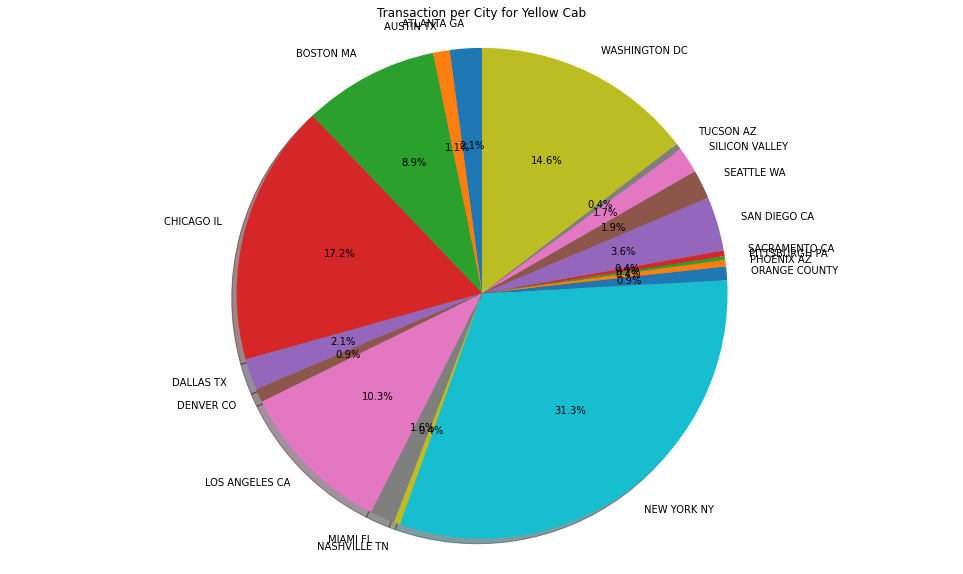

In [85]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [86]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

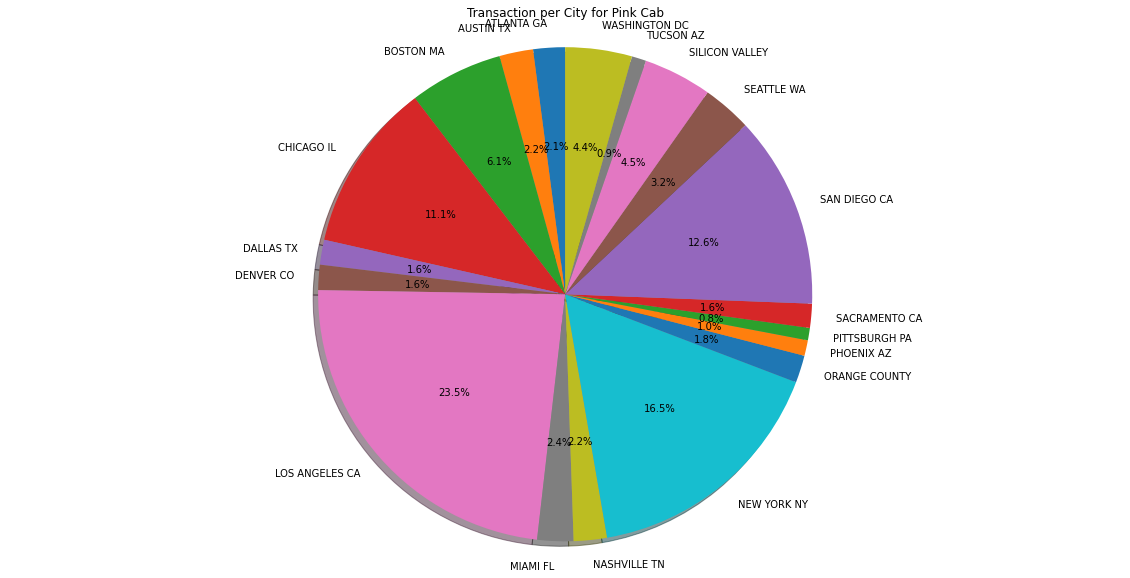

In [87]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

### Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%

### Transaction for Pink Cab is highest in Los Angeles City

In [88]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

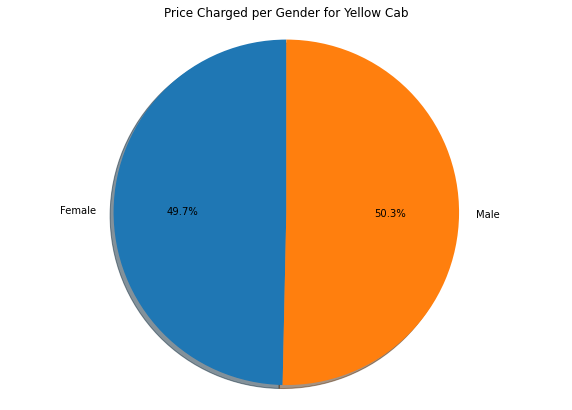

In [89]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [90]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

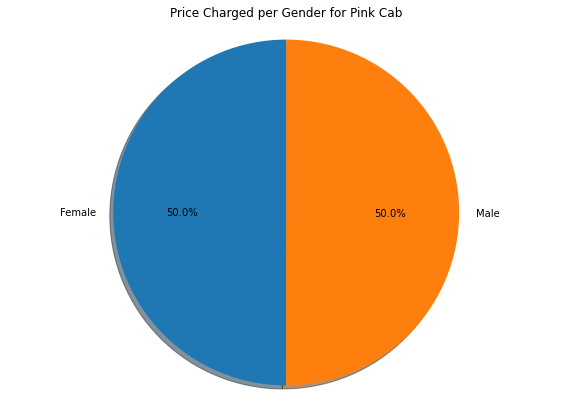

In [108]:
labs = gender_p.index
vals = gender_p.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [91]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

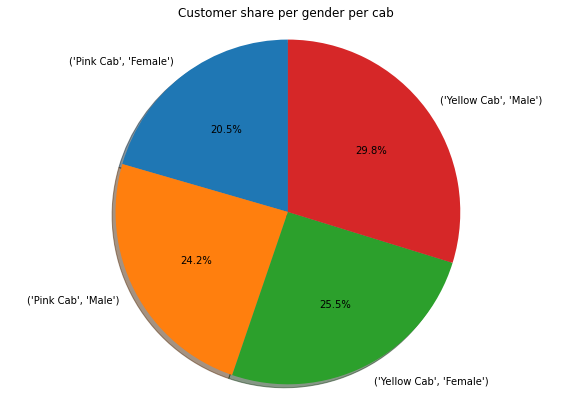

In [92]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

Female Customers in Yellow Cab is higher compared to Female customers in Pink Cab 
Male Customers in Yellow Cab is the highest

In [93]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

,Transaction_ID,Customer_ID,City,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,08-01-2018,Pink Cab,30.45,370.95,313.635,2018,8,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,06-01-2018,Pink Cab,28.62,358.52,334.854,2018,6,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,02-01-2018,Pink Cab,9.04,125.20,97.632,2018,2,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,07-01-2018,Pink Cab,33.17,377.40,351.602,2018,7,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,03-01-2018,Pink Cab,8.73,114.62,97.776,2018,3,Card,Male,33,8536,"814,885","24,701",16.844


In [94]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,0.000172,-0.001007,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.038760,-0.035980,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.003731,-0.001701,-0.000189,-0.000633,0.486056
Month,0.000172,-0.038760,-0.003731,1.000000,-0.011226,-0.000648,0.000363,-0.062662
Year,-0.001007,-0.035980,-0.001701,-0.011226,1.000000,-0.000745,-0.001687,-0.059903
Age,-0.000369,-0.003084,-0.000189,-0.000648,-0.000745,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000363,-0.001687,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.062662,-0.059903,-0.005093,0.006148,1.000000


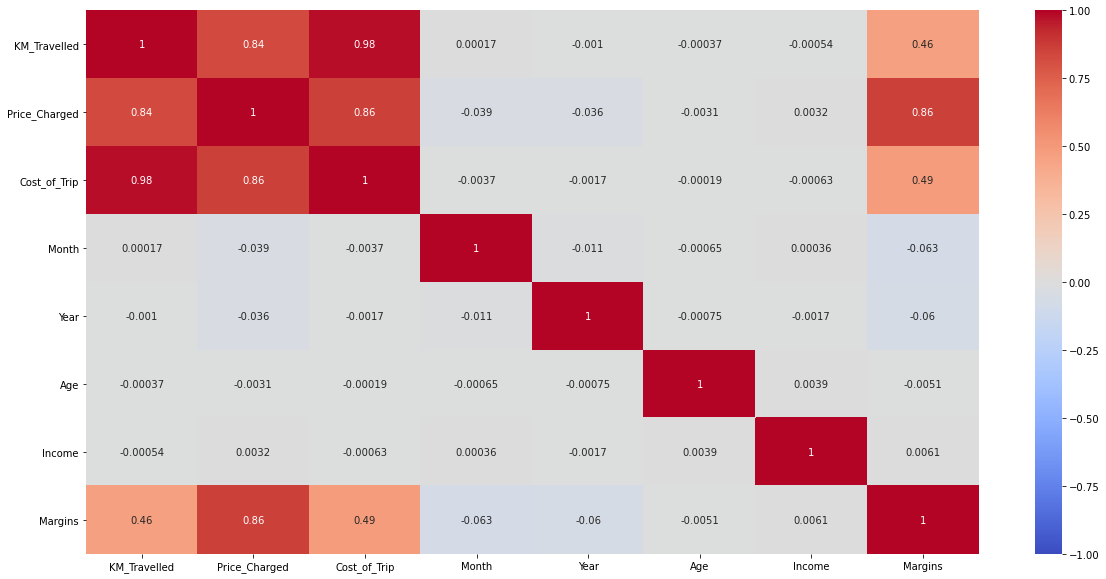

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

In [96]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

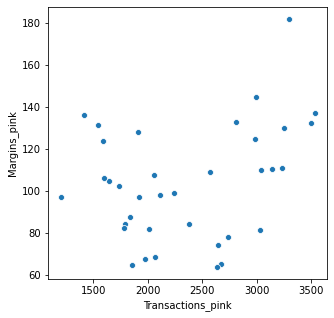

In [97]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

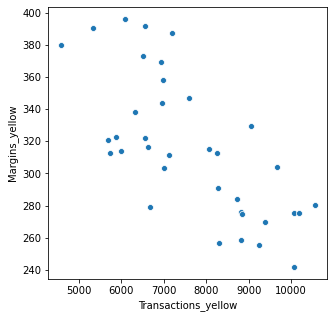

In [98]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

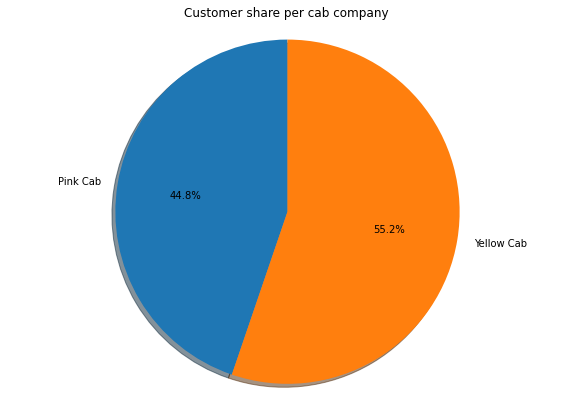

In [105]:
#import plotly.express as px
data0 = data.groupby("Company").count()
customer_cab=data.groupby('Company').Customer_ID.nunique()
labs = customer_cab.index
vals = customer_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per cab company')
plt.show()

